<a href="https://colab.research.google.com/github/kumudu12/EN5870/blob/main/Assignment_on_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1. Load Data from given CSV Files ("w.csv", "X.csv" and "y.csv"). Here, the features (X) and the target variable (y) are given in "X.csv" and "y.csv" files, respectively.

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load feature dataset X
df_X = pd.read_csv('./X.csv')
df_X.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512
0,0.162,0.0396,0.1010,0.2490,0.2050,-0.10100,0.09520,-0.0143,-0.0101,0.0399,...,0.1130,-0.0217,-0.0370,-0.0597,-0.1750,-0.15700,-0.1120,0.1340,0.0950,0.1510
1,-0.122,-0.1950,-0.0681,0.0195,0.0547,0.10800,0.02850,0.1640,-0.0218,-0.0888,...,-0.0817,-0.0842,0.0239,-0.1720,0.0230,0.00971,0.0969,0.0721,-0.0443,-0.1210
2,0.157,-0.0784,-0.1080,-0.1200,0.1220,-0.05360,-0.07550,0.0130,-0.0203,-0.0660,...,-0.0109,0.1270,-0.1760,0.0158,-0.1700,0.08430,-0.1160,0.0292,-0.0299,-0.1280
3,-0.148,-0.0506,0.1800,-0.0326,0.1010,-0.00589,0.08790,-0.1720,-0.0395,0.0924,...,0.1220,0.0667,-0.1300,0.0144,-0.0797,-0.01590,0.0229,0.0103,-0.0504,0.1400
4,-0.155,0.0723,-0.1920,0.0425,-0.0972,0.09060,0.00866,0.0234,-0.0997,-0.0637,...,-0.1510,-0.1440,0.0135,0.0814,0.0684,0.03400,0.0823,-0.0606,-0.0289,0.0812


In [5]:
#load target dataset y
df_y = pd.read_csv('./y.csv')
df_y.head(5)

,y
0,-28.90
1,8.07
2,39.20
3,2.16
4,-4.62


In [6]:
#load w dataset
df_w = pd.read_csv('./w.csv')
df_w.head(5)

,0.000000000000000000e+00
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


2. Linear regression is a supervised learning technique used to model the relationship between a set of input features (X) and a target variable (y). Perform linear regression to learn parameters (weight vector) for the given data set.

Data shape:  (100, 512) (100,)
Coefficients:   [-6.98640471e-02 -8.53734148e+00 -1.06355641e+01  2.89206833e+00
 -4.03751752e+00 -5.28637790e+00 -2.60173649e+00 -3.34819905e+00
 -6.20528827e+00  3.51467907e-01  1.30070954e+00  3.91332209e+00
  1.28228001e+01 -1.24805847e+01  4.17897940e-01 -6.11346719e+00
  1.95563444e+00  8.75115278e-01  1.45221486e+00  5.60965891e+00
 -1.08030785e+00  2.31668482e+00  5.56088734e+00  4.01028550e+00
  3.16445026e+00  5.59302504e+00  9.26633848e-01 -1.01205735e+01
  4.06092101e-02 -1.00848181e+01  3.50569752e-01 -5.36600494e+00
 -1.06477688e+01 -2.46855442e+00  1.83888434e+00  1.22140444e+00
 -3.97844302e+00 -6.33942927e-02 -2.80809874e-02  5.21718043e+00
  8.16513088e+00  8.50608788e+00  3.50071248e+00  8.11132537e+00
 -8.78006916e+00 -3.77711937e-01 -5.81661138e+00 -3.49746433e+00
 -8.05033663e+00 -5.46002847e+00  9.69842932e-01  1.47215168e+00
 -1.13702164e+01  1.91512010e+00  1.13417292e+00  4.17826072e+00
  2.93222178e+00 -5.12375840e+00 -1.9254869

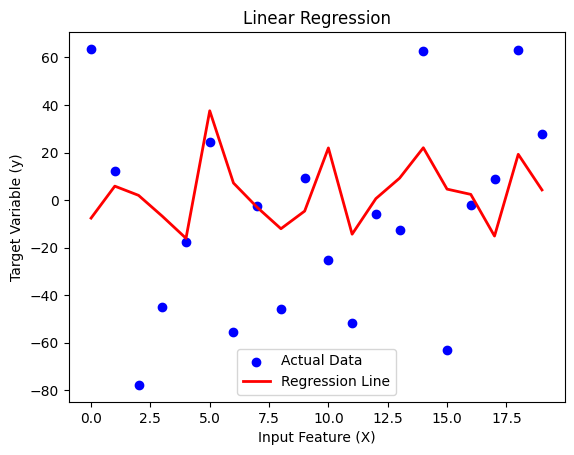

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df_y = pd.read_csv('./y.csv')
df_y = df_y.values.reshape(-1)
print("Data shape: ", df_X.shape, df_y.shape)

#Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

#Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

#Create linear regression object
regr = linear_model.LinearRegression()

#Train the model
regr.fit(df_X_train, df_y_train)

#Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

#The coeffcients
print("Coefficients:  ", regr.coef_)
#The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(df_y_test, df_y_pred))
#The coefficient of determination:
print("Coefficient of determination: %.2f" % r2_score(df_y_test, df_y_pred))

df_X_test=np.arange(0,len(df_X_test),1)
plt.scatter(df_X_test,df_y_test,color='blue',label='Actual Data')
plt.plot(df_X_test,df_y_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Input Feature (X)')
plt.ylabel('Target Variable (y)')
plt.title('Linear Regression')
plt.legend()

3.  Plot the learned parameters (weight vector) and true parameters (given in "w.csv").
Briefly comment on the results.


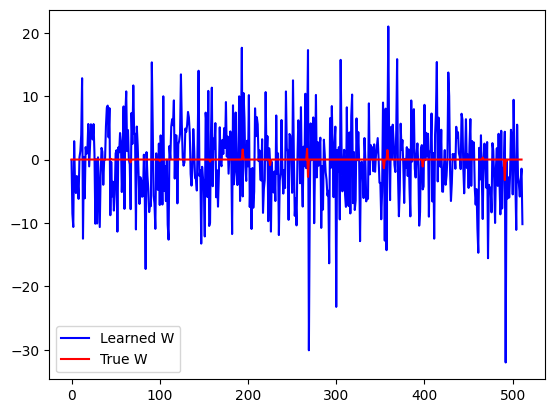

In [11]:
#w1 = np.array(regr.coef_)
plt.plot(regr.coef_, color ='blue', label = 'Learned W') #Plot learned parameters
plt.plot(df_w, color = 'red', label = 'True W') #Plot true parameters
plt.legend()

4.  Perform ridge regression to learn parameters (weight vector) for the given data set (Here, set regularization parameter λ = 0.1).

In [15]:
#import numpy as np
#from sklearn import linear_model
ridge_reg = linear_model.RidgeCV(alphas=0.1) #set regularization parameter as 0.1
ridge_reg.fit(df_X, df_y)
ridge_reg.coef_

array([ 1.84780471e+00, -1.16425291e+01, -9.06636140e+00,  5.73884813e+00,
       -2.43638318e+00, -5.16588483e+00, -4.18951198e+00, -2.52623727e+00,
       -9.29185073e+00, -6.71288025e+00,  4.40885805e+00,  2.34279207e+00,
        1.37157365e+01, -6.71369330e+00, -3.09080521e+00, -2.48787114e+00,
        8.35085142e+00,  1.84483247e+00,  1.99870763e+00,  5.02862208e+00,
       -3.06652475e+00,  1.16733165e+00, -1.58311356e+00,  1.06043864e+01,
        1.60532375e+00, -3.30194236e+00, -1.80028024e+00, -6.41835761e+00,
       -2.35286322e+00, -4.43325400e+00, -2.66904652e+00, -4.69229726e+00,
       -7.24189943e+00,  3.01753640e+00,  5.35645534e+00,  1.85113358e+00,
       -3.32461573e+00, -6.59095380e+00,  3.20270633e+00, -1.59543052e+00,
        1.01528587e+01,  3.73567651e+00,  7.43454815e+00,  1.51825413e+00,
       -4.88818924e+00, -1.36285687e+00, -8.48456392e+00, -7.94878515e+00,
       -6.61142675e+00,  7.69273137e-01, -5.27159643e-01, -1.09189968e-01,
       -1.01561961e+01,  

5.  Plot the learned parameters (weight vector) of ridge regression and true parameters (given in "w.csv"). Briefly comment on the results.


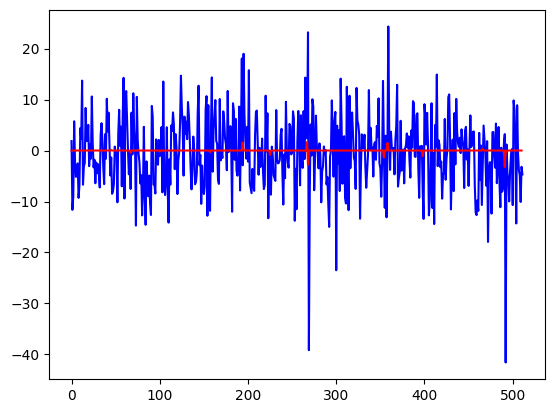

In [18]:
plt.plot(ridge_reg.coef_, color = 'blue', label = 'Learned W') #plot learned parameters of ridge regression
plt.plot(df_w, color = 'red', label = 'True W')

6. What is the impact of the regularization parameter (λ)? Plot the learned parameters (weight vector) of ridge regression and true parameters (given in "w.csv") for different values of the regularization parameter λ (e.g., λ = 10−9, λ = 10−6, λ = 10−3, λ =10−1, λ = 1, λ = 10). Comment on your results.


In [19]:
import numpy as np
from sklearn import linear_model
ridge_reg = linear_model.RidgeCV(alphas=0.000000001)
ridge_reg.fit(df_X, df_y)
r1 = ridge_reg.coef_
r1

ridge_reg = linear_model.RidgeCV(alphas=0.000001)
ridge_reg.fit(df_X, df_y)
r2 = ridge_reg.coef_
r2

ridge_reg = linear_model.RidgeCV(alphas=0.001)
ridge_reg.fit(df_X, df_y)
r3 = ridge_reg.coef_
r3

ridge_reg = linear_model.RidgeCV(alphas=0.01)
ridge_reg.fit(df_X, df_y)
r4 = ridge_reg.coef_
r4

ridge_reg = linear_model.RidgeCV(alphas=1)
ridge_reg.fit(df_X, df_y)
r5 = ridge_reg.coef_
r5

ridge_reg = linear_model.RidgeCV(alphas=10)
ridge_reg.fit(df_X, df_y)
r6 = ridge_reg.coef_
r6

array([ 3.97456966e-01, -4.23292399e+00, -3.09438943e+00,  1.43618561e+00,
       -1.48689150e+00, -8.13303255e-01, -1.25449092e+00, -3.27541657e-01,
       -3.19040375e+00, -1.93324574e+00,  1.04549489e+00,  1.47430615e+00,
        4.36483952e+00, -2.75357907e+00, -9.78103973e-01, -1.44168242e+00,
        2.57162389e+00,  2.91438777e-01, -7.90341959e-01,  1.10561109e+00,
       -3.55885635e-01,  1.22974350e+00, -3.12325207e-01,  2.48896548e+00,
        8.75619773e-01, -4.41189016e-01, -1.32950865e+00, -2.21897397e+00,
       -2.00502753e+00, -9.08831684e-01, -1.13716705e+00, -9.18850762e-01,
       -1.14194738e+00,  1.85918681e+00,  1.61894716e+00, -6.07004599e-02,
       -1.62041393e+00, -2.60794811e+00,  7.28724676e-01, -1.08299413e+00,
        4.77654640e+00,  1.62559444e+00,  3.00352755e+00,  1.93925905e+00,
       -1.12539534e+00,  3.63003021e-01, -4.08475992e+00, -3.81970925e+00,
       -2.63342018e+00,  5.85524009e-03, -8.54635914e-01, -4.13221183e-02,
       -4.25540569e+00,  

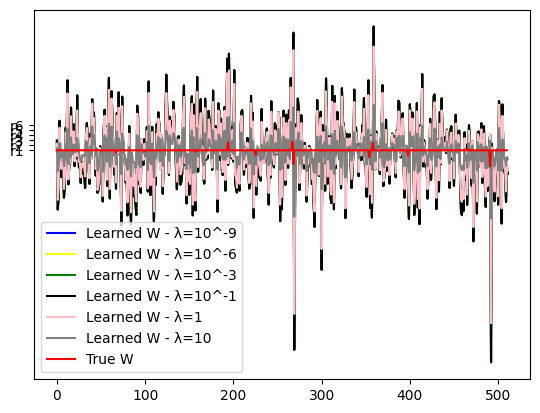

In [23]:
#a = [0.000000001, 0.000001, 0.001, 0.1, 1, 10]
r = ['r1', 'r2','r3', 'r4', 'r5','r6']
for i in r:
  plt.plot(i)

plt.plot(r1, color = 'blue', label = 'Learned W - λ=10^-9')
plt.plot(r2, color = 'yellow', label = 'Learned W - λ=10^-6')
plt.plot(r3, color = 'green', label = 'Learned W - λ=10^-3')
plt.plot(r4, color = 'black', label = 'Learned W - λ=10^-1')
plt.plot(r5, color = 'pink', label = 'Learned W - λ=1')
plt.plot(r6, color = 'gray', label = 'Learned W - λ=10')
plt.plot(df_w, color = 'red', label = 'True W')
plt.legend()

In [ ]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-9, 1, 6))
reg.fit(df_X, df_y)
#reg.alpha_
r1 = reg.coef_
r1

array([ 1.94262532e+00, -1.18733923e+01, -9.31208471e+00,  5.91237215e+00,
       -2.41465595e+00, -5.39349646e+00, -4.29664885e+00, -2.65014532e+00,
       -9.51554216e+00, -6.91422077e+00,  4.53070013e+00,  2.34485441e+00,
        1.40309266e+01, -6.83005342e+00, -3.18339241e+00, -2.47732884e+00,
        8.56864646e+00,  1.93888800e+00,  2.22553821e+00,  5.21996768e+00,
       -3.18504053e+00,  1.10093793e+00, -1.63850259e+00,  1.10222650e+01,
        1.59810176e+00, -3.46481651e+00, -1.74502007e+00, -6.55942313e+00,
       -2.27380866e+00, -4.62532489e+00, -2.70227537e+00, -4.85872927e+00,
       -7.55806589e+00,  2.98547411e+00,  5.47236701e+00,  1.98327285e+00,
       -3.34945100e+00, -6.72807845e+00,  3.31400998e+00, -1.59653775e+00,
        1.02293736e+01,  3.74781547e+00,  7.56528473e+00,  1.36697407e+00,
       -5.06643342e+00, -1.46877313e+00, -8.52122261e+00, -8.04043590e+00,
       -6.76547199e+00,  8.05219624e-01, -4.45443891e-01, -1.07646258e-01,
       -1.02545184e+01,  

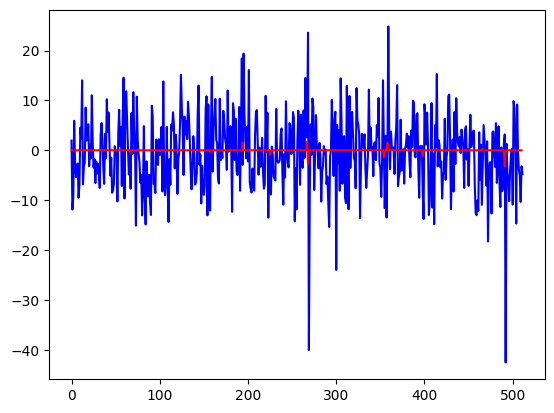

In [ ]:
plt.plot(r1, color = 'blue', label = 'Learned W')
plt.plot(df_w, color = 'red', label = 'True W')

7.  Perform Lasso regression [1] to learn parameters (weight vector) for the given dataset (Here, set regularization parameter λ = 0.1).


In [24]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(df_X, df_y)
#reg.predict()
lr = lasso_reg.coef_
lr

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.40917108e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

8.  Plot the learned parameters (weight vector) of Lasso regression and true parameters(given in "w.csv"). Briefly comment on the results.

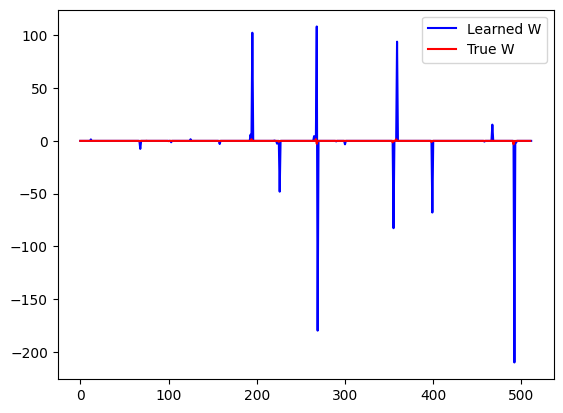

In [26]:
plt.plot(lr, color = 'blue', label = 'Learned W')
plt.plot(df_w, color = 'red', label = 'True W')
plt.legend()

9. What is the impact of the regularization parameter (λ)? Plot the learned parameters (weight vector) of lasso regression and true parameters (given in "w.csv") for different values of the regularization parameter λ (e.g., λ = 10−9, λ = 10−6, λ = 10−3, λ =10−1, λ = 1). Comment on your results.

In [27]:
#import numpy as np
#from sklearn import linear_model
lasso_reg = linear_model.Lasso(alphas=np.logspace(-9, 1, 6))
lasso_reg.fit(df_X, df_y)
lasso_reg.alpha_
lr1 = lasso_reg.coef_
lr1

TypeError: ignored

10.  For lasso regression, how do you tune the regularization parameter?

11. . For this given dataset, what method (linear, ridge, lasso) performs better? briefly explain the reason behind this.

12.  Next, we examine the effect of noisy measurements by introducing noise to thesignal. Change the "noise_sigma" for values of 10−9, 10−3, 10−1, 1 and 10. Then,
train the aforementioned models using the different noise levels. To observe how noise influences the performance of each model, plot the Mean Squared Error (MSE) between the estimated parameters (weight vector) and true parameters (given in "w.csv") for different noise levels. Comment on your results.


5. Plot the learned parameters (weight vector) of ridge regression and true parameters (given in "w.csv"). Briefly comment on the results.

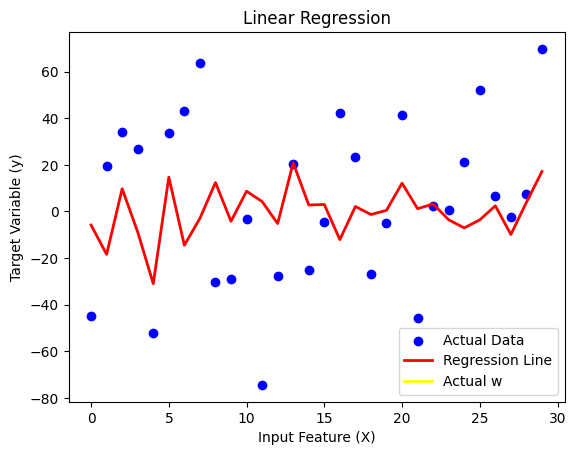

In [ ]:
df_X_test=np.arange(0,len(df_X_test),1)
plt.scatter(df_X_test,df_y_test,color='blue',label='Actual Data')
plt.plot(df_X_test,df_y_test_pred,color='red',linewidth=2,label='Regression Line')
df_w=df_w[:-412]
plt.plot(df_w, color='yellow', linewidth=2,label='Actual w' )
plt.xlabel('Input Feature (X)')
plt.ylabel('Target Variable (y)')
plt.title('Linear Regression')
plt.legend()

6. What is the impact of the regularization parameter (λ)? Plot the learned parameters (weight vector) of ridge regression and true parameters (given in "w.csv") for different
values of the regularization parameter λ (e.g., λ = 10−9, λ = 10−6, λ = 10−3, λ =10−1, λ = 1, λ = 10). Comment on your results

MSE train: 0.000, test: 1246.458
R^2 train: 1.000, test: 0.003


NameError: ignored

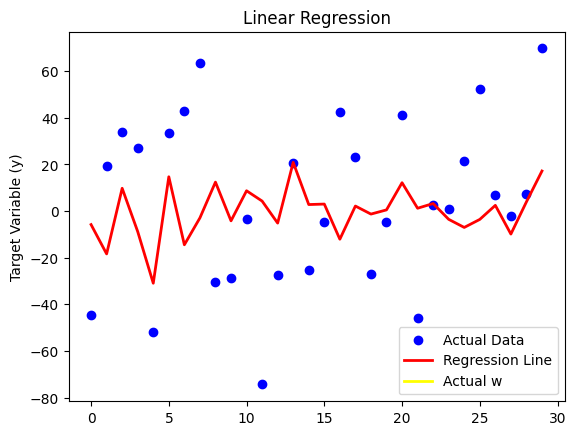

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot

df_X = pd.read_csv('./X.csv')
df_y = pd.read_csv('./y.csv')

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

def plot_lwr(tau):
    # prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_regression(x0, df_X, df_Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400)
    plot.title.text = 'tau=%g' % tau
    plot.scatter(df_X, df_Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot

pipeline = make_pipeline(StandardScaler(), Ridge(alpha= 0.1))
pipeline.fit(df_X_train, df_y_train)

df_y_train_pred = pipeline.predict(df_X_train)
df_y_test_pred = pipeline.predict(df_X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(df_y_train, df_y_train_pred), mean_squared_error(df_y_test, df_y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(df_y_train, df_y_train_pred), r2_score(df_y_test, df_y_test_pred)))

df_X_test=np.arange(0,len(df_X_test),1)
plt.scatter(df_X_test,df_y_test,color='blue',label='Actual Data')
plt.plot(df_X_test,df_y_test_pred,color='red',linewidth=2,label='Regression Line')
df_w=df_w[:-412]
plt.plot(df_w, color='yellow', linewidth=2,label='Actual w' )
plt.ylabel('Target Variable (y)')
plt.title('Linear Regression')
plt.legend()

show(gridplot([
    [plot_lwr(10.), plot_lwr(1.)],
    [plot_lwr(0.1), plot_lwr(0.01)]
]))